# Importing Libraries


In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.exceptions import ConvergenceWarning
from imblearn.over_sampling import RandomOverSampler

# Data Preprocessing

**Importing the dataset**

In [101]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [102]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

**Printing Missing Values**

In [103]:
missing=df.isna().sum()
print(missing)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


**Splitting into Numerical and Categorical Features**

In [104]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()
print("Numerical: ",numerical_features)
print("Catgorical: ",categorical_features)

Numerical:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Catgorical:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Dropping the rows having null values in RainTomorrow column since we can't fill the null values for a column which we are going to predict


In [105]:
df.dropna(subset=['RainTomorrow'], inplace=True)

**Filling the null values of Numercal Columns with median**

In [106]:
for column in numerical_features:
  df[column].fillna(df[column].median(), inplace=True)

**Filling the null values of Categorical Columns with most frequent value**

In [107]:
for column in categorical_features:
  df[column].fillna(df[column].mode()[0],inplace=True)

In [108]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

**Encoding Categorical Columns**

Using label encoder for RainToday and RainTomorrow, and using one hot encoding for other categorical columns

In [109]:
label_encoder = LabelEncoder()
for i in categorical_features[5:]:
  df[i] = label_encoder.fit_transform(df[i])
df = pd.get_dummies(df, columns = categorical_features[1:5])

df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-12-01,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,...,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,...,0,1,0,0,0,0,0,0,0,0


Dropping 'Date' as it does not contribute much for classification

In [110]:
df=df.drop(columns='Date',axis=1)

# Splitting into Train and Test

In [111]:
X = df.drop(columns = ['RainTomorrow'])
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 8)

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Logistic Regression

In [112]:
logistic_classifier = LogisticRegression(max_iter = 1500, solver = 'liblinear')
logistic_classifier.fit(X_train, y_train)

y_pred = logistic_classifier.predict(X_test)

**Confusion Matrix and Heat Map**

Confusion Matrix

 [[26182  1472]
 [ 3902  3993]] 



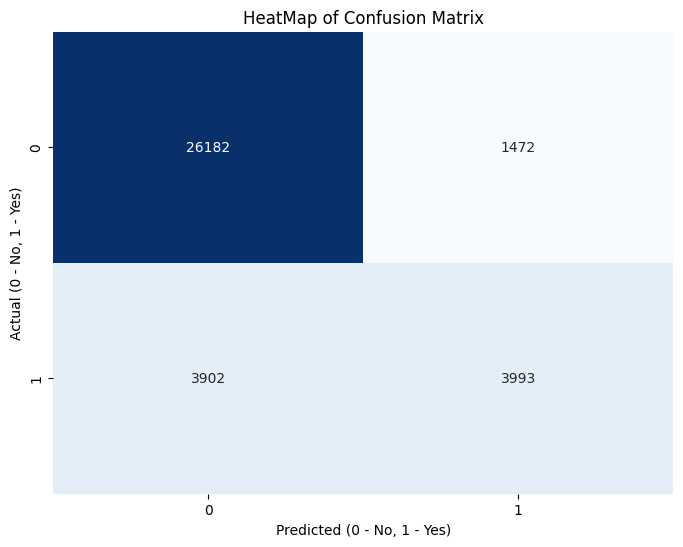

In [113]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n\n", cm, "\n")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted (0 - No, 1 - Yes)')
plt.ylabel('Actual (0 - No, 1 - Yes)')
plt.title('HeatMap of Confusion Matrix')
plt.show()

**Classification Report and Accuracy Score**

In [114]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", round(acc_score*100, 2), "%")

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     27654
           1       0.73      0.51      0.60      7895

    accuracy                           0.85     35549
   macro avg       0.80      0.73      0.75     35549
weighted avg       0.84      0.85      0.84     35549

Accuracy Score:  84.88 %


**ROC Curve and finding Optimal Threshold**

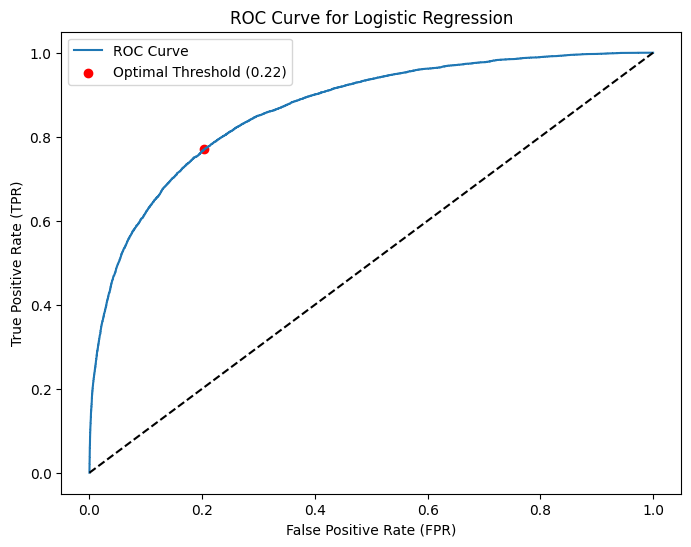

ROC-AUC Score:  86.63
Optimal Threshold:  0.22


In [115]:
y_prob = logistic_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test.values, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')

roc_auc = roc_auc_score(y_test, y_prob)
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]

plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], marker='o', color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')

plt.legend()
plt.show()

print("ROC-AUC Score: ", round(roc_auc*100, 2))
print("Optimal Threshold: ", round(optimal_threshold, 2))

y_pred_adjusted = (y_prob >= optimal_threshold).astype(int)

**Accuracy Score after adjusting threshold**

In [116]:
acc_score = accuracy_score(y_test, y_pred_adjusted)
print("Accuracy Score: ", round(acc_score*100, 2), "%")

Accuracy Score:  79.03 %


**Inference after adjusting the threshold**

* Adjusting the threshold changes the balance between true positives and true negatives.
*This causes a reduction in accuracy score.

**Cross Validation with k-folds( k = 3 )**

In [117]:
k = 3

cv_scores = cross_val_score(logistic_classifier, X, y, cv=k)

mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Standard Deviation of CV Scores:", std_cv_score)

Cross-Validation Scores: [0.82452846 0.82438078 0.83612887]
Mean CV Score: 0.8283460351974691
Standard Deviation of CV Scores: 0.0055036247613577385


3-fold analysis produces scores that are close to the initial model accuracy, but does not produce scores greater than the initial score.

**Test for overfit or underfit**

In [118]:
print(f"Training set score: {logistic_classifier.score(X_train, y_train):0.4f}")
print(f"Testing set score: {logistic_classifier.score(X_test,y_test):.4f}")

Training set score: 0.8465
Testing set score: 0.8488


* Since training set score is larger than testing set score, it causes over-fitting.
* Since it is just a small difference in accuracy, It does not contribute to significant amount of over-fitting.

**Optimizing Regularization parameter**

In [119]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(logistic_classifier, param_grid, cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Regularization Hyperparameter:", best_params)

best_model = grid_search.best_estimator_
best_model_performance = best_model.score(X_test, y_test)
print("Model Performance with Best Hyperparameter:", round(best_model_performance*100, 2), "%")

Best Regularization Hyperparameter: {'C': 1}
Model Performance with Best Hyperparameter: 84.88 %


Optimal Regularization parameter is chosen and the accuracy score is increased by around 0.1%.

# Linear Regression with Balanced Dataset

**Train Test Split with Balancing using OverSample**

In [120]:
X_b = df.drop(columns = ['RainTomorrow'])
y_b = df['RainTomorrow']

ros = RandomOverSampler()
X_b, y_b = ros.fit_resample(X_b, y_b)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size = 0.25, random_state = 37)

The RandomOverSampler is a technique used in handling imbalanced datasets, specifically in the context of classification problems where one class is significantly underrepresented compared to the others.
It addresses this issue by randomly duplicating samples from the minority class until the class distribution is balanced.

**Fitting the model**

In [121]:
logistic_classifier_b = LogisticRegression(max_iter = 1500, solver = 'liblinear')
logistic_classifier_b.fit(X_train_b, y_train_b)

y_pred_b = logistic_classifier_b.predict(X_test_b)

**Confusion Matrix and Heatmap**

Confusion Matrix

 [[21974  5505]
 [ 6407 21272]] 



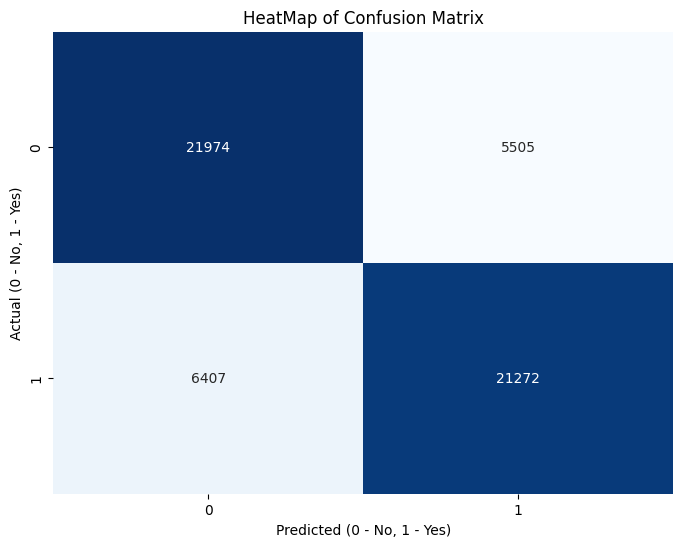

In [122]:
cm = confusion_matrix(y_test_b, y_pred_b)
print("Confusion Matrix\n\n", cm, "\n")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted (0 - No, 1 - Yes)')
plt.ylabel('Actual (0 - No, 1 - Yes)')
plt.title('HeatMap of Confusion Matrix')
plt.show()

**Accuracy Score**

In [123]:
acc_score = accuracy_score(y_test_b, y_pred_b)
print("Accuracy Score: ", round(acc_score*100, 2), "%")

Accuracy Score:  78.4 %


**Adjusting based on Optimal Threshold**

In [124]:
y_prob_b = logistic_classifier_b.predict_proba(X_test_b)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_b.values, y_prob_b)

roc_auc = roc_auc_score(y_test_b, y_prob_b)
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]

print("ROC-AUC Score: ", round(roc_auc*100, 2))
print("Optimal Threshold: ", round(optimal_threshold, 2))

y_pred_adjusted_b = (y_prob_b >= optimal_threshold).astype(int)

ROC-AUC Score:  86.87
Optimal Threshold:  0.47


**Accuracy after adjusting with threshold**

In [125]:
acc_score = accuracy_score(y_test_b, y_pred_adjusted_b)
print("Accuracy Score: ", round(acc_score*100, 2), "%")

Accuracy Score:  78.45 %


* Accuracy score is increased in this case unlike the previous case where the dataset is imbalanced.
* Since, the dataset is already balanced here Accuracy increases.

#  Naive Bayes classifier

**Fitting and predicting using Gaussian Naive Bayes**

In [126]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)

**Confusion Matrix and Heatmap**

Confusion Matrix

 [[17145 10509]
 [ 2272  5623]] 



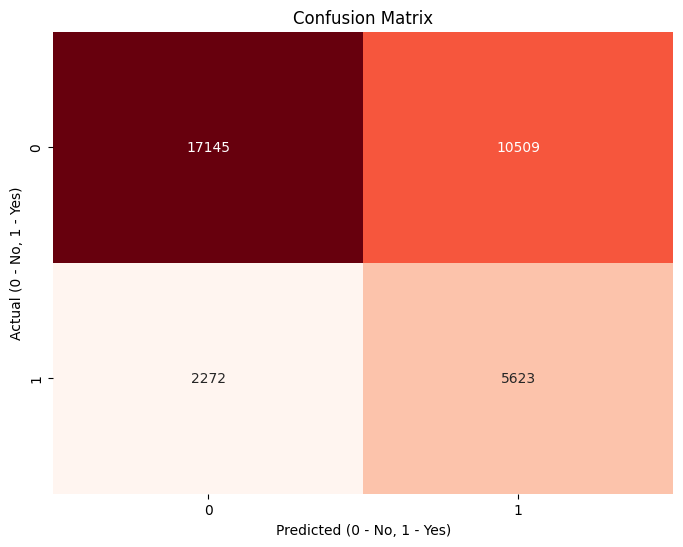

In [127]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n\n", cm, "\n")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', cbar=False)
plt.xlabel('Predicted (0 - No, 1 - Yes)')
plt.ylabel('Actual (0 - No, 1 - Yes)')
plt.title('Confusion Matrix')
plt.show()

**Classification report and Accuracy score**

In [128]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", round(acc_score*100, 2), "%")

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.62      0.73     27654
           1       0.35      0.71      0.47      7895

    accuracy                           0.64     35549
   macro avg       0.62      0.67      0.60     35549
weighted avg       0.76      0.64      0.67     35549

Accuracy Score:  64.05 %


**ROC Curve and optimal threshold**

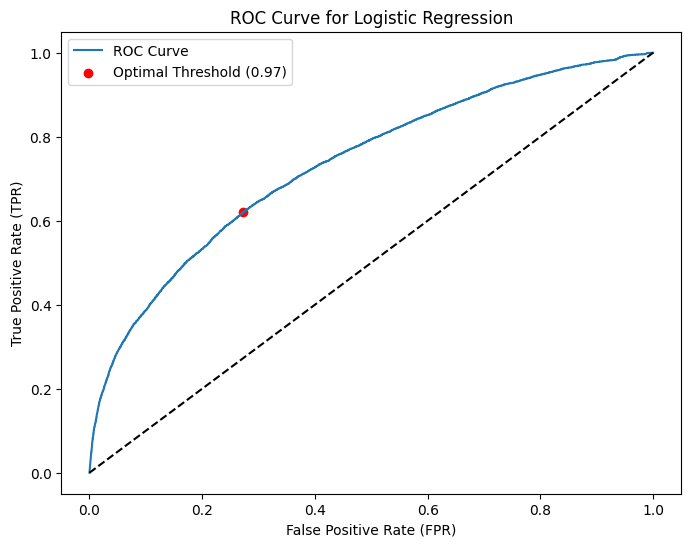

ROC-AUC Score:  73.56
Optimal Threshold:  0.97


In [129]:
y_prob = gnb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test.values, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')

roc_auc = roc_auc_score(y_test, y_prob)
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]

plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], marker='o', color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')

plt.legend()
plt.show()

print("ROC-AUC Score: ", round(roc_auc*100, 2))
print("Optimal Threshold: ", round(optimal_threshold, 2))

y_pred_adjusted = (y_prob >= optimal_threshold).astype(int)

**Accuracy Score after adjusting threshold**

In [130]:
acc_score = accuracy_score(y_test, y_pred_adjusted)
print("Accuracy Score: ", round(acc_score*100, 2), "%")

Accuracy Score:  70.41 %


* Gaussian Naive Bayes classifier bias is leaned towards the majority class.
* The accuracy score increases due to the balancing of both the classes by the threshold and bias is leaning less towards majority class.

**Cross-Validation with k-folds (k=3)**


In [131]:
k = 3

cv_scores = cross_val_score(gnb, X, y, cv=k)

mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Standard Deviation of CV Scores:", std_cv_score)

Cross-Validation Scores: [0.65884636 0.693236   0.58875034]
Mean CV Score: 0.6469442363977583
Standard Deviation of CV Scores: 0.04347841389913935


3-fold analysis produces scores that are close to the initial model accuracy, and one of the scores is higher than initial accuracy (at 2-fold). Hence, k-fold cross validation increases the accuracy.

**Test for overfit or underfit**

In [132]:
print(f"Training set score: {gnb.score(X_train, y_train):0.4f}")
print(f"Testing set score: {gnb.score(X_test,y_test):.4f}")

Training set score: 0.6417
Testing set score: 0.6405


* Since training set score is larger than testing set score, it causes over-fitting.
* Since it is just a small difference in accuracy, It does not contribute to significant amount of over-fitting.

#  Naive Bayes Classification with Balanced Dataset

**Train Test Split with Balancing using OverSample**

In [133]:
X_b = df.drop(columns = ['RainTomorrow'])
y_b = df['RainTomorrow']

ros = RandomOverSampler()
X_b, y_b = ros.fit_resample(X_b, y_b)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size = 0.20, random_state = 0)

**Fitting the Model**

In [134]:
gnb_b = GaussianNB()
gnb_b.fit(X_train_b, y_train_b)

y_pred_b = gnb_b.predict(X_test_b)

**Confusion Matrix and Heatmap**

Confusion Matrix

 [[12740  9212]
 [ 5499 16676]] 



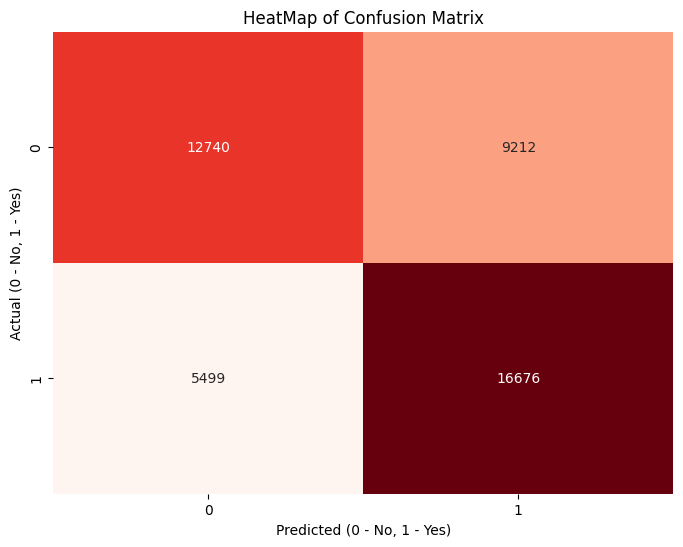

In [135]:
cm = confusion_matrix(y_test_b, y_pred_b)
print("Confusion Matrix\n\n", cm, "\n")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', cbar=False)
plt.xlabel('Predicted (0 - No, 1 - Yes)')
plt.ylabel('Actual (0 - No, 1 - Yes)')
plt.title('HeatMap of Confusion Matrix')
plt.show()

**Accuracy Score**

In [136]:
acc_score = accuracy_score(y_test_b, y_pred_b)
print("Accuracy Score: ", round(acc_score*100, 2), "%")

Accuracy Score:  66.66 %


**Adjusting based on Optimal Threshold**

In [137]:
y_prob_b = gnb_b.predict_proba(X_test_b)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_b.values, y_prob_b)

roc_auc = roc_auc_score(y_test_b, y_prob_b)
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]

print("ROC-AUC Score: ", round(roc_auc*100, 2))
print("Optimal Threshold: ", round(optimal_threshold, 2))

y_pred_adjusted_b = (y_prob_b >= optimal_threshold).astype(int)

ROC-AUC Score:  74.27
Optimal Threshold:  0.98


**Accuracy after adjusting with threshold**

In [138]:
acc_score = accuracy_score(y_test_b, y_pred_adjusted_b)
print("Accuracy Score: ", round(acc_score*100, 2), "%")

Accuracy Score:  67.85 %


* The accuracy increases due to the same bias being leaned towards majority class.
* It does not produce a significant change because the dataset is almost well-balanced.